<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN3/blob/main/btvn3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

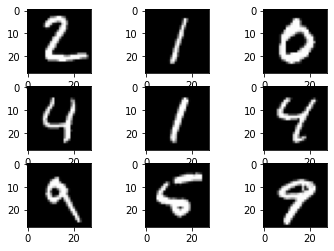

In [11]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import utils
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils



(x_train,y_train),(x_test,y_test) = mnist.load_data()
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_test[i],cmap='gray')


x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train= x_train.reshape(60000,28,28,1)
x_test= x_test.reshape(10000,28,28,1)

x_train/= 255
x_test/= 255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation= 'relu',input_shape= (28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),input_shape= (28,28),activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),input_shape= (28,28),activation= 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [14]:
model.compile(optimizer='Adam',loss= 'categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train,y_train,batch_size= 128,epochs= 50,verbose=1,validation_data=(x_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience= 20)])

Epoch 1/50
469/469 [==============================] - 15s 9ms/step - loss: 0.3221 - accuracy: 0.8971 - val_loss: 0.1127 - val_accuracy: 0.9649
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0922 - accuracy: 0.9717 - val_loss: 0.0699 - val_accuracy: 0.9784
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0650 - accuracy: 0.9799 - val_loss: 0.0900 - val_accuracy: 0.9713
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.0608 - val_accuracy: 0.9817
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0512 - val_accuracy: 0.9854
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0512 - val_accuracy: 0.9846
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0538 - val_accuracy: 0.9848
Epoch

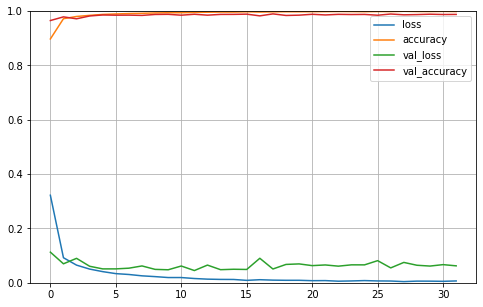

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


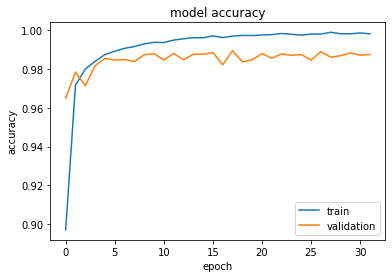

In [15]:
score = model.evaluate(x_test, y_test, verbose = 0)
y_pred = model.predict(x_test)
y_pred
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

Đoán là số:  9


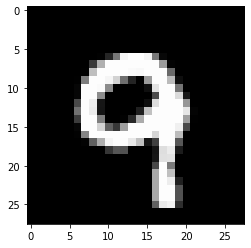

In [28]:
m = 99
y_predict = model.predict(x_test[m].reshape(1,28,28,1))
print('Đoán là số: ', np.argmax(y_predict))
plt.imshow(x_test[m],cmap='gray')

TypeError: ignored

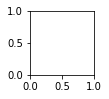

In [ ]:
for i in range(1,10):
  plt.subplot(330+i)
  plt.imshow(x_test[i],cmap='gray')